In [11]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from dtaidistance import dtw

In [12]:

path = '../CRWU'

mat_files = glob.glob(os.path.join(path, '**', '*.mat'), recursive=True)


In [13]:
dataframes = {}
for mat_file in mat_files:
    data_file = loadmat(mat_file)
    print(f"Exploring file: {mat_file}")
    data_keys = [k for k in data_file.keys() if k not in ['__header__', '__version__', '__globals__'] or 'RPM' in k]
    print(f"Keys: {data_keys}")
    df = {}    
    for var in data_keys:
        if len(data_file[var]) > 1 :
            df[var] = {'data' : np.array(data_file[var]).squeeze(), 'number_of_data': len(data_file[var])}
    dataframes[mat_file] = df

Exploring file: ../CRWU\12k Drive End Bearing Fault Data\Ball\0007\B007_0.mat
Keys: ['X118_DE_time', 'X118_FE_time', 'X118_BA_time', 'X118RPM']
Exploring file: ../CRWU\12k Drive End Bearing Fault Data\Ball\0007\B007_1.mat
Keys: ['X119_DE_time', 'X119_FE_time', 'X119_BA_time', 'X119RPM']
Exploring file: ../CRWU\12k Drive End Bearing Fault Data\Ball\0007\B007_2.mat
Keys: ['X120_DE_time', 'X120_FE_time', 'X120_BA_time', 'X120RPM']
Exploring file: ../CRWU\12k Drive End Bearing Fault Data\Ball\0007\B007_3.mat
Keys: ['X121_DE_time', 'X121_FE_time', 'X121_BA_time', 'X121RPM']
Exploring file: ../CRWU\12k Drive End Bearing Fault Data\Ball\0014\B014_0.mat
Keys: ['X185_DE_time', 'X185_FE_time', 'X185_BA_time', 'X185RPM']
Exploring file: ../CRWU\12k Drive End Bearing Fault Data\Ball\0014\B014_1.mat
Keys: ['X186_DE_time', 'X186_FE_time', 'X186_BA_time', 'X186RPM']
Exploring file: ../CRWU\12k Drive End Bearing Fault Data\Ball\0014\B014_2.mat
Keys: ['X187_DE_time', 'X187_FE_time', 'X187_BA_time', 'X1

In [19]:
def dba_update(series, prototype, max_iter=10):
    """
    Applique l'algorithme DBA pour trouver un prototype moyen de la série temporelle.
    
    Args:
        series (list of arrays): Liste de séries temporelles pour le clustering.
        prototype (array): Prototype initial pour commencer l'alignement.
        max_iter (int): Nombre d'itérations DBA.

    Returns:
        array: Prototype mis à jour après l'alignement DBA.
    """
    for _ in range(max_iter):
        # Initialise les accumulateurs pour le barycentre
        accum_series = [np.zeros_like(prototype) for _ in prototype]
        count_series = [0 for _ in prototype]

        # Aligne chaque série avec le prototype actuel
        print(series)
        for s in series:
            alignment = dtw.warping_path(s, prototype)
            for i, j in alignment:
                accum_series[j] += s[i]
                count_series[j] += 1

        # Mise à jour du prototype en prenant la moyenne des alignements
        prototype = np.array([
            accum_series[j] / count_series[j] if count_series[j] > 0 else prototype[j]
            for j in range(len(prototype))
        ])
    return prototype

In [ ]:
data_file = dataframes[mat_files[0]]
series = [data['data'][::4] for data in data_file.values()]
initial_prototype = series[0]
prototype_dba = dba_update(series, initial_prototype)
plt.figure(figsize=(10, 6))
for s in series:
    plt.plot(s, color='gray', alpha=0.5, label='Séries temporelles' if s is series[0] else "")
plt.plot(prototype_dba, color='blue', label='Prototype DBA', linewidth=2)
plt.legend()
plt.title("Dynamic Time Barycentric Average (DBA)")
plt.show()

[array([-0.0027614 , -0.05831421, -0.21993717, ..., -0.09924786,
       -0.05100463, -0.07829373]), array([-0.24716182,  0.13601091,  0.14731091, ...,  0.06040364,
        0.03513273,  0.01643636]), array([ 0.01553163,  0.00772558, -0.00164973, ...,  0.01871039,
       -0.04550849,  0.03178754])]


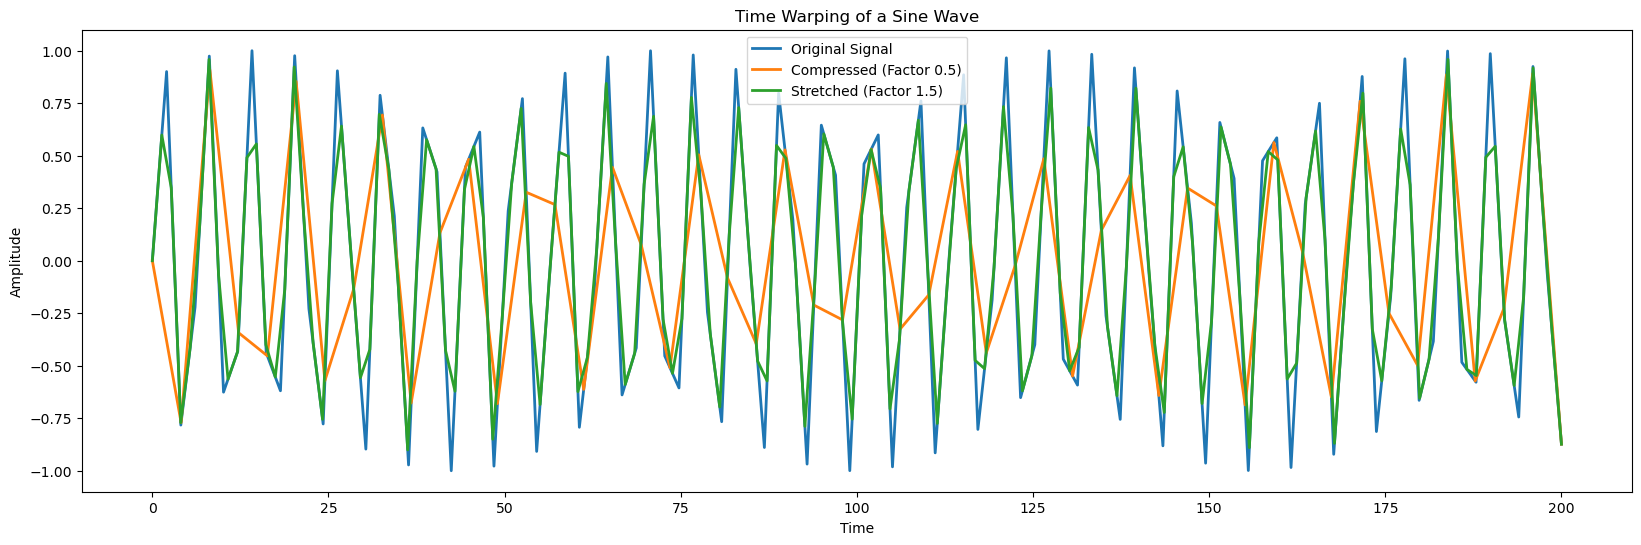

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Generate original sine wave
time_limit = 200
t = np.linspace(0, time_limit, 100)
original_signal = np.sin(t)

# Time-warping function
def time_warp(signal, factor=0.8):
    # Compress or stretch the signal in the time dimension
    new_time = np.linspace(0, time_limit, int(len(t) * factor))
    interpolator = interp1d(np.linspace(0, time_limit, len(signal)), signal, kind="linear")
    return new_time, interpolator(new_time)

# Apply time-warping with different factors
t_warped1, signal_warped1 = time_warp(original_signal, factor=0.5)  # compressed
t_warped2, signal_warped2 = time_warp(original_signal, factor=1.5)  # stretched

# Plotting
plt.figure(figsize=(20, 6))
plt.plot(t, original_signal, label="Original Signal", linewidth=2)
plt.plot(t_warped1, signal_warped1, label="Compressed (Factor 0.5)", linewidth=2)
plt.plot(t_warped2, signal_warped2, label="Stretched (Factor 1.5)", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Time Warping of a Sine Wave")
plt.legend()
plt.show()
